# Functions and Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

# Project Case Scenario 
Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

# Becoming familiar with the dataset
The following describes the dataset variables:

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per `$10,000`

- PTRATIO - pupil-teacher ratio by town

- LSTAT - \% lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's



# Loading the dataset

In [35]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [31]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [8]:
boston_df.shape

(506, 14)

# Generating Descriptive Statistics and Visualizations

<Axes: ylabel='MEDV'>

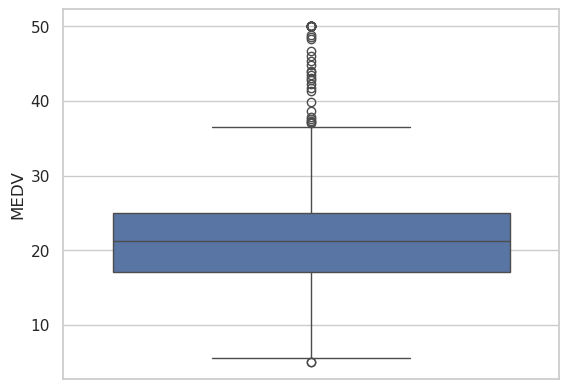

In [10]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.set(style="whitegrid")
sns.boxplot( y='MEDV', data=boston_df)

In [11]:
boston_df['MEDV'].median()

21.2

In [32]:
boston_df.loc[(boston_df['CHAS'] > 0), 'CHAS'] = 'BoundsRiver'
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS'] = 'NotRiverBound'


/tmp/ipykernel_381139/1027973128.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'BoundsRiver' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boston_df.loc[(boston_df['CHAS'] > 0), 'CHAS'] = 'BoundsRiver'


<Axes: ylabel='CHAS'>

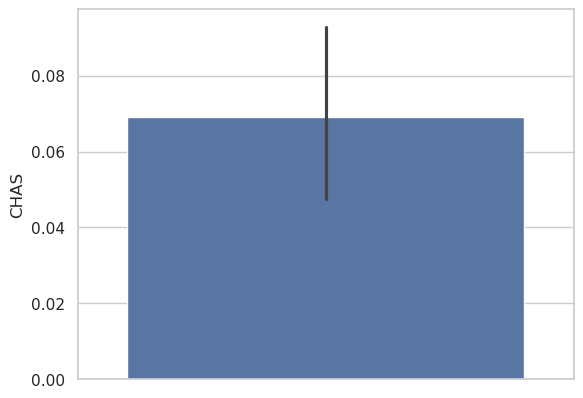

In [36]:
# Provide a  bar plot for the Charles river variable
sns.barplot(y="CHAS", data=boston_df)

<BarContainer object of 2 artists>

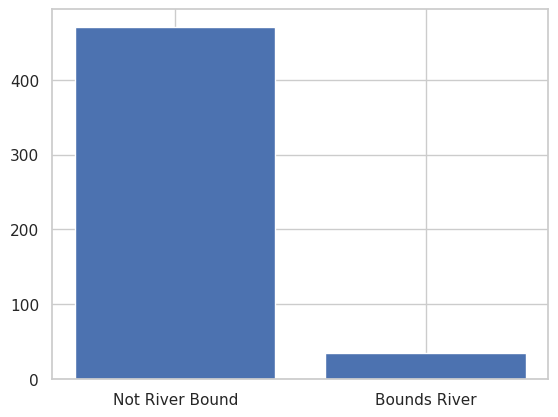

In [49]:
# Count the occurrences of 1 and 0
cnt = boston_df['CHAS'].value_counts()
# Create a bar plot
labels = ['Not River Bound', 'Bounds River']
values = cnt.values

plt.bar(labels, values)

/tmp/ipykernel_381139/3619846278.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '35 years and younger' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'


<Axes: xlabel='AGE_GRP', ylabel='MEDV'>

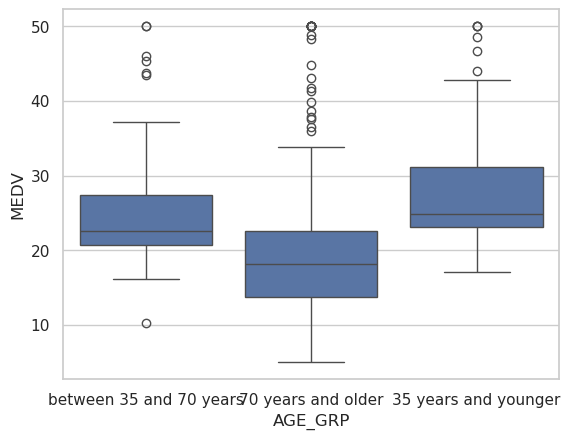

In [13]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GRP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GRP'] = '70 years and older'

# Provide a boxplot for the MEDV variable vs the AGE variable. 
sns.boxplot( x='AGE_GRP', y='MEDV', data=boston_df)

<Axes: xlabel='NOX', ylabel='INDUS'>

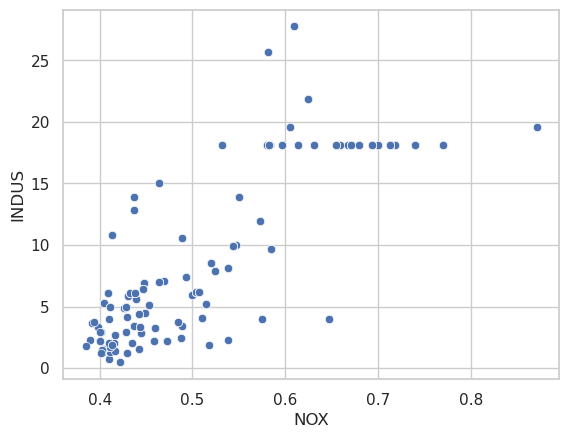

In [14]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

There is a faint positive correlation between Nitric Oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS) when the value is less than 0.6 . After which the INDUS value plateus at ~18 even as NOX is increasing.

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

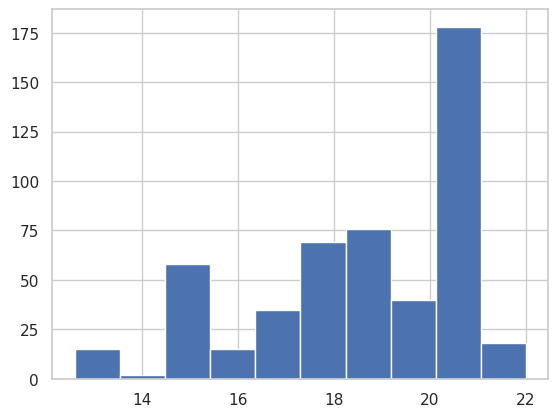

In [16]:
# Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'])

# Using the appropriate tests to answer the questions provided

**Is there a significant difference in median value of houses bounded by the Charles river or not?**

**Hypothesis:** 
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river or not")


In [50]:
# T-test for independent samples
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

**Conclusion:** pvalue < 0.05, we **reject the null hypothesis** as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable. In the newly assigned group our categories will be value of AGE that is:
* 35 years and younger
* between 35 and 70 years
* 70 years and older


In [52]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GRP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GRP'] = '70 years and older'

/tmp/ipykernel_381139/9801428.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '35 years and younger' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GRP'] = '35 years and younger'


In [53]:
thirty_lower = boston_df[boston_df['AGE_GRP'] == '35 years and younger']['MEDV']
thirty_seventy = boston_df[boston_df['AGE_GRP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GRP'] == '70 years and older']['MEDV']

**Hypothesis:** 
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ

In [54]:
# Running one way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirty_lower, thirty_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since pvalue is less than 0.05, we reject the null hypothesis against the alternative hypothesis that atleast one of the means differ for the different classes of AGE

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

State the hypothesis:
* $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [55]:
# Testing via Pearson's correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

**What is the impact of an additional weighted distance  to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)?**

**Hypothesis:**
* $H_0: β1$ = 0 (DIS has no effect on MEDV)
* $H_1: β1$ is not equal to 0 (DIS has an effect on MEDV)

Doing regression analysis, taking MEDV as independant variable

In [59]:
## X is the input variable (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        22:44:32   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a effect on MEDV based on DIS. The coefficient 0.0572 means that MEDV can be 0.0572 greater than DIS.